# ECE 6397 - Project 1

- Name: Pham, Quoc Huy 
- SSID: 2299356

In [1]:
import numpy as np
from numpy.random import rand, randn
import matplotlib.pyplot as plt
from scipy.linalg import cho_solve, cholesky


# Step 1:
Recall that the general quadratic programming problem is given by

$$\text{min}_{x \in \mathbb{R}^n} \frac{1}{2} x^T P x + q^T x + r$$
   
   Subject to $ lb \leq x \leq ub $

   where $ P \in S_+ $, $b \in \mathbb{R}^n $,  $r $ is a constant, and $ l $ and $ u $ are scaling parameters.


# Step 2: 
Generate the related parameter with following code:

In [2]:
#Generate the ralated parameters
np.random.seed(42)
n = 100

#Generate well conditioned matrix
P = np.random.rand(n,n)
P = P + P.T
#Calculate the eigenvalue decomposition of P
D,V = np.linalg.eig(P)
#Make a diagonal matrix from the Px
P = V @ np.diag(rand(n) +1) @ V.T 

In [3]:
q = randn(n, 1)
r = rand(1)
l = rand(n,1)
u = rand(n,1)
lb = np.minimum(l,u)
ub = np.maximum(l,u)

In [4]:
#Define function to calculate the objective function
def objective(x):
    return (0.5 * x.T @ P @ x - q.T @ x + r).flatten()

We introduce auxiliaire variable z to seperate the box contrainst $lb \leq x \leq ub$ , then the problem becomes: 

$\underset{z, x}{\operatorname{\argmin}} \text{ } x^{T}P x   + q^{T}x + r$ 

$\text{s.t}$ 

$x-z = 0$

$lb \leq z \leq ub$

the Lagrangian of the problem is: 

$L(x,y,z) =  x^{T}P x   + q^{T}x + r + u^{T}(x-z) + \frac{\rho}{2}||x-z||^{2}_{2}$

where $u$ is the dual variable and $\rho$ is a control parameter. 

The optimal $x$ for such problem is $x^{*}  = (P+\rho)^{-1} (\rho z -q -y)$

In [5]:
#Define the parameters for the ADMM algorithm
NUM_ITER = 1000
ABSTOL = 1e-4
RELTOL = 1e-4
LEARNING_RATE = 1e-3
rho = 1.0
alpha = 1.0 

#Initialize the z,x and u 
u = np.zeros((n,1))
x = np.zeros((n,1))
z = np.zeros((n,1))

#Get place holders for the objective function, r and s
obj = [] 
rs = []
ss = []

#Start ADMM Algorithm
for i in range(NUM_ITER):

    #Solve for x
    if i > 0:
        x = cho_solve((R, True), rho * (z - u) - q)
    else:
        R = cholesky(P + rho * np.eye(n), lower=True)
        x = cho_solve((R, True), rho * (z - u) - q)

    # z-update with relaxation
    zold = z.copy()
    x_hat = alpha * x + (1 - alpha) * zold
    z = np.minimum(ub, np.maximum(lb, x_hat + u))

    # u-update
    u += (x_hat - z)

    # diagnostics, reporting, termination checks
    obj_val = objective(x)  # Assuming `objective` function is defined elsewhere
    r_norm = np.linalg.norm(x - z)
    s_norm = np.linalg.norm(-rho * (z - zold))
    eps_pri = np.sqrt(n) * ABSTOL + RELTOL * max(np.linalg.norm(x), np.linalg.norm(-z))
    eps_dual = np.sqrt(n) * ABSTOL + RELTOL * np.linalg.norm(rho * u)

    obj.append(obj_val)
    rs.append(r_norm)
    ss.append(s_norm)

    if r_norm < eps_pri and s_norm < eps_dual:
        break

# Step 3:
Print out the result of objective function at every step. i.e., Y axis represents the value
of objective function, while X axis represents iteration k.

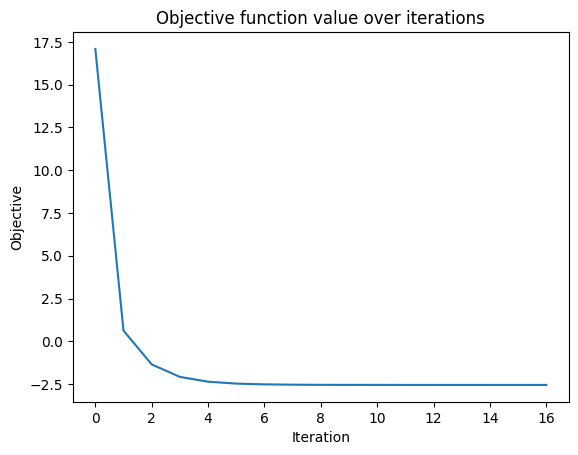

In [6]:
#Plot the objective function
plt.plot(obj)
plt.xlabel('Iteration')
plt.ylabel('Objective')
plt.title('Objective function value over iterations')
plt.show()

In [7]:
print(f"Optimal objective function value is {obj[-1]}")

Optimal objective function value is [-2.54442095]


# Step 4: 

Recall that when ADMM proceeds, we define

$$ s^{k+1} = p^T B(z^{k+1} - z^k) $$

as the _dual residual_ at iteration \( k + 1 \), and

$$ r^{k+1} = A x^{k+1} + B z^{k+1} - c $$

as the _primal residual_ at iteration \( k + 1 \). It is verified that a reasonable termination criterion is that the primal and dual residuals must be small, i.e.,

$$ \left\| r^k \right\|_2 \leq \epsilon^{pri}, \quad \left\| s^k \right\|_2 \leq \epsilon^{dual}, $$

where $ \epsilon^{pri} $ and $ \epsilon^{dual} $ are feasibility tolerances which is small enough.

We assume that both $ \epsilon^{pri} $ and $ \epsilon^{dual} $ equals to $ 10^{-4} $. Then print out the variation of primal and dual residual with respect to the iterations.


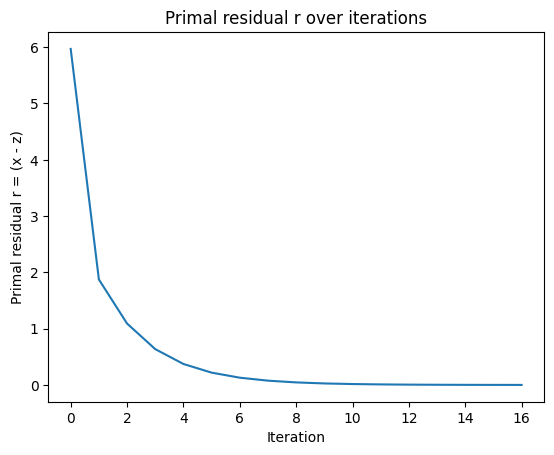

In [8]:
#Plot primal residual r
plt.plot(rs)
plt.xlabel('Iteration')
plt.ylabel('Primal residual r = (x - z)')
plt.title('Primal residual r over iterations')
plt.show()


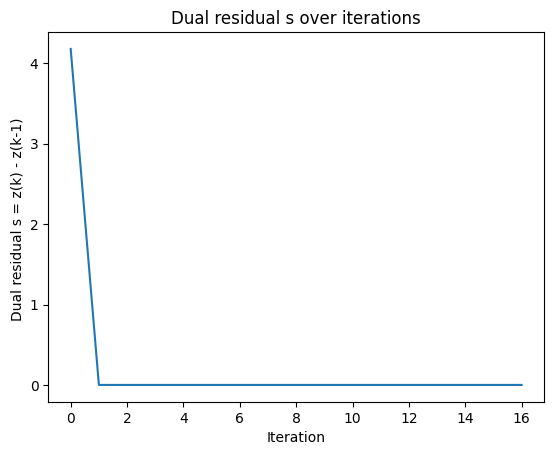

In [9]:
#Plot  dual residual s
plt.plot(ss)
plt.xlabel('Iteration')
plt.ylabel('Dual residual s = z(k) - z(k-1) ')
plt.title('Dual residual s over iterations')
plt.show()

In [10]:
#print rs and zs
print(f"Primal residual r = {r_norm}")
print(f"Dual residual s = {s_norm}")

Primal residual r = 0.0009003920239482861
Dual residual s = 0.0
